讀取WAV、正規化、dBSPL Scale

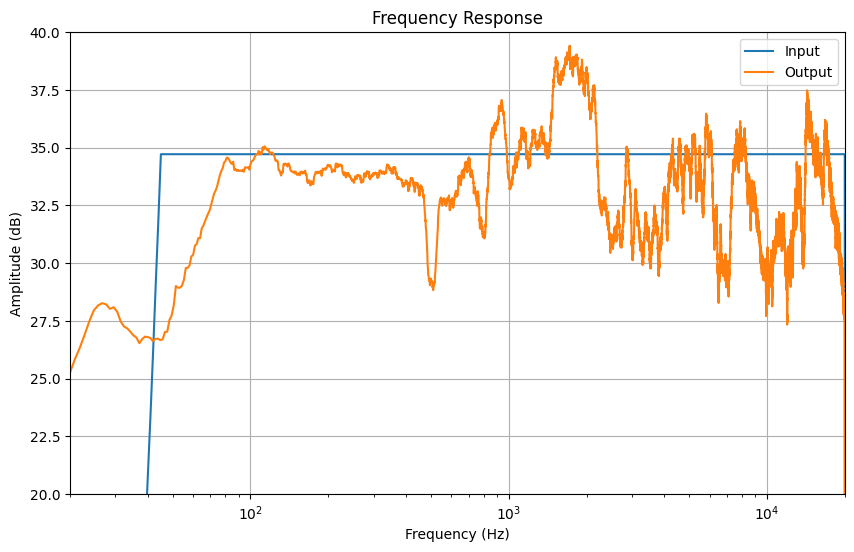

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Read Wav and normalize
def read_wav(wav_file):
    sample_rate, data = wavfile.read(wav_file)
    data = data / max(data)
    return data, sample_rate

def smooth(y, box_pts):
    box = np.ones(box_pts) / box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

def frequency_response(wav, sample_rate):
    data = wav
    if len(data.shape) > 1:
        data = data[:, 0]
    
    n = len(data)
    freq = np.fft.fftfreq(n, d=1/sample_rate)
    fft_data = np.fft.fft(data)
    
    fft_data = 20 * np.log10(np.abs(fft_data))
    
    freq = freq[:n//2]
    fft_data = fft_data[:n//2]
    
    fft_data_smooth = smooth(fft_data, 50)
    return freq, fft_data_smooth

wav1, sample_rate1 = read_wav('WAV/WAV-INPUT.wav')
wav2, sample_rate2 = read_wav('WAV/WAV-OUTPUT.wav')

freq1, Curve1 = frequency_response(wav1, sample_rate1)
freq2, Curve2 = frequency_response(wav2, sample_rate2)

plt.figure(figsize=(10, 6))
plt.plot(freq1, Curve1, label='Input')
plt.plot(freq2, Curve2, label='Output')
plt.xlabel('Frequency (Hz)')
plt.xscale('log')
plt.xlim(20, 20000)
plt.ylabel('Amplitude (dB)')
plt.ylim(20, 40)
plt.title('Frequency Response')
plt.legend()
plt.grid()
plt.show()


WAV時域訊號

<function matplotlib.pyplot.show(close=None, block=None)>

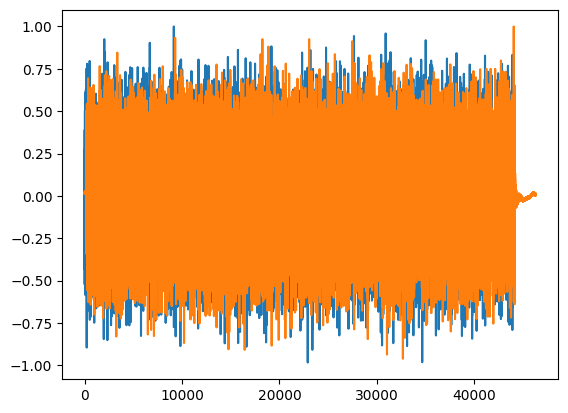

In [2]:
plt.plot(wav1)
plt.plot(wav2)
plt.show

對兩個WAV做Correlation

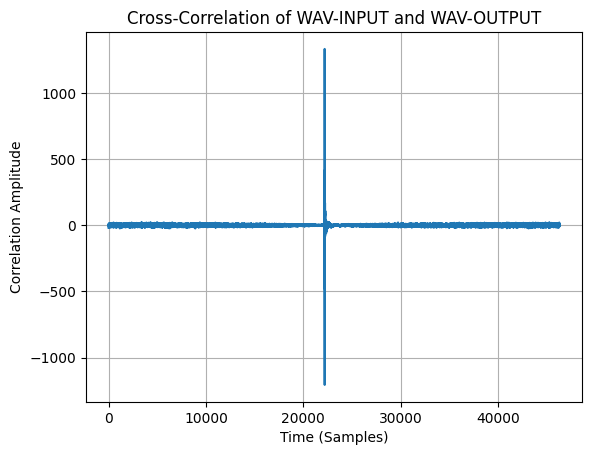

In [3]:
import numpy as np
import scipy.io.wavfile as wavfile
import matplotlib.pyplot as plt

wav1, sample_rate1 = read_wav('WAV/WAV-INPUT.wav')
wav2, sample_rate2 = read_wav('WAV/WAV-OUTPUT.wav')

# filename = 'WAV-INPUT.wav'
# sample_rate, data1 = wavfile.read(filename)
# data1 = data1/max(data1)

# filename2 = 'WAV-OUTPUT.wav'
# sample_rate, data2 = wavfile.read(filename2)
# data2 = data2/max(data2)

output = np.correlate(wav2,wav1,mode='same')

plt.plot(output)
plt.title('Cross-Correlation of WAV-INPUT and WAV-OUTPUT')
plt.xlabel('Time (Samples)')
plt.ylabel('Correlation Amplitude')
plt.grid()
plt.show()

找出Correlation最大值並切段顯示

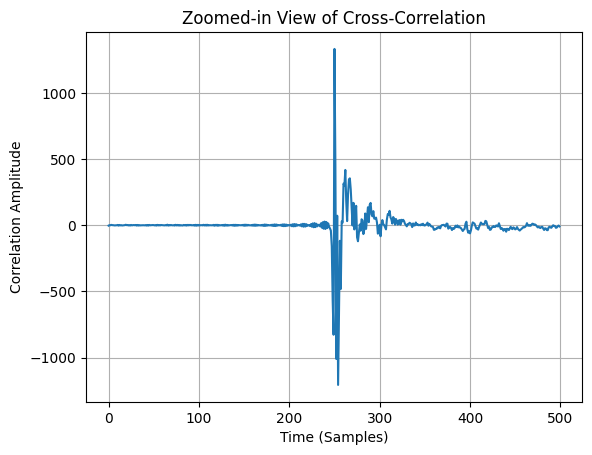

In [4]:
# import numpy as np
# import scipy.io.wavfile as wavfile
# import matplotlib.pyplot as plt

# wav1, sample_rate1 = read_wav('WAV-INPUT.wav')
# wav2, sample_rate2 = read_wav('WAV-OUTPUT.wav')
# output = np.correlate(wav2, wav1, mode='same')

# 找到最大值索引
max_index = np.argmax(output)
# 绘制以最大值索引为中心的一段相关性数据
plt.plot(output[max_index - 250: max_index + 250])
plt.title('Zoomed-in View of Cross-Correlation')
plt.xlabel('Time (Samples)')
plt.ylabel('Correlation Amplitude')
plt.grid()
plt.show()


FFT並畫出IR FR吧

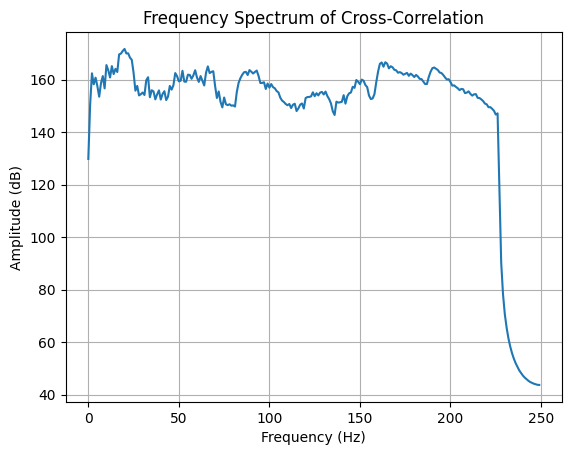

In [5]:
# 计算FFT
impulse_response = np.fft.fft(output[max_index - 250: max_index + 250])
yf_amplitude = np.abs(impulse_response[:len(impulse_response)//2])
yf_amplitude = 20 * np.log(yf_amplitude)

# 绘制频谱图
plt.plot(yf_amplitude)
plt.title('Frequency Spectrum of Cross-Correlation')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
plt.grid()
plt.show()


以下程式碼是測試用

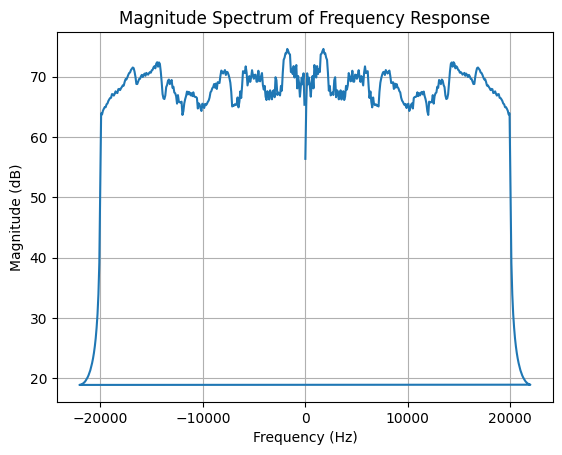

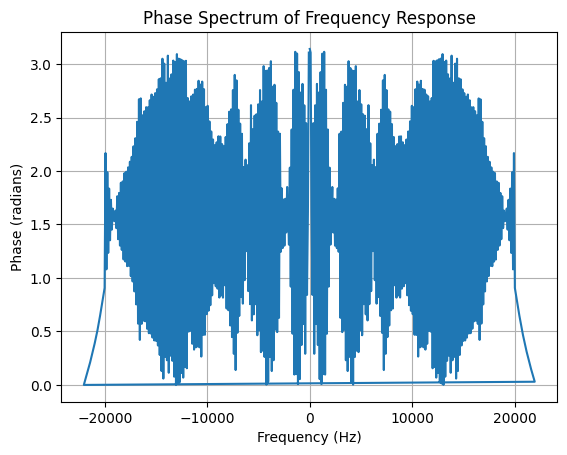

In [6]:
# 计算FFT
#impulse_response = np.fft.fft(output[max_index - 250: max_index + 250])

# 获取频率响应的幅度和相位
frequency_magnitude = np.abs(impulse_response)
frequency_phase = np.angle(impulse_response)

# 将频率响应的幅度和相位转换成以dB为单位的幅度
frequency_magnitude_db = 20 * np.log10(frequency_magnitude)

# 构造频率轴
n = len(frequency_magnitude_db)
sample_rate = 44100  # 假设采样率为 44100 Hz
freq_axis = np.fft.fftfreq(n, d=1/sample_rate)

# 绘制频率响应的幅度图
plt.plot(freq_axis, abs(frequency_magnitude_db))
plt.title('Magnitude Spectrum of Frequency Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid()
plt.show()

# 绘制频率响应的相位图
plt.plot(freq_axis, abs(frequency_phase))
plt.title('Phase Spectrum of Frequency Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.grid()
plt.show()


In [ ]:
import numpy as np
from scipy.io import wavfile
from numpy.fft import irfft
import matplotlib.pyplot as plt

# 將幅度和相位組合成復數形式的頻率響應
#complex_frequency_response = frequency_magnitude * np.exp(1j * frequency_phase)

# 進行逆傅立葉變換得到時域脈沖響應
#impulse_response = irfft(complex_frequency_response)


# 讀取要處理的WAV檔案
fs, audio_signal = wavfile.read('WAV/place_drum.wav')
audio_signal = audio_signal.astype(float)

# 應用FIR濾波器（卷積）
output_signal = np.convolve(audio_signal, impulse_response, mode='same')

# 保存輸出音頻
wavfile.write('output_with_reverb.wav', fs, output_signal.astype(np.int16))

# 顯示脈沖響應
plt.plot(impulse_response)
plt.title('Impulse Response')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
yf_amplitude = yf_amplitude[:44100]
print(len(yf_amplitude))
print(yf_amplitude)
print('impulse_response',impulse_response)

In [ ]:
from numpy.fft import irfft
impulse_response = irfft(yf_amplitude)

plt.plot(impulse_response)
